In [1]:
import matplotlib.pyplot as plt
from stars import StarTable
import copy
from planets import PlanetTable, CandidateTable
import h5py as hp
import numpy as np
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = 'dejavuserif'

In [2]:
planets = PlanetTable()
candidates = CandidateTable()
planets.loadTable('x_confirmed.tbl')
candidates.loadTable('cand_with_met.tbl')

column headers from IPAC table:
['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim

In [3]:
for t in [planets, candidates]:
    t.periodCut()
    t.magCut()
    t.tempCut((3600, 7100))
    t.loggCut()
#     t.loggCut((3,4.9))

    

number of planets before period cut:
2709

number of planets to fail period cut:
371

number of planets left:
2338

number of planets before magnitude cut:
2338

number of planets to fail magnitude cut:
5

number of planets left:
2333

number of planets before effective temperature cut:
2333

number of planets to fail effective temperature cut:
102

number of planets left:
2251

number of planets before log(g) cut:
2251

number of planets to fail log(g) cut:
150

number of planets left:
2175

number of candidates before period cut:
2057

number of candidates to fail period cut:
738

number of candidates left:
1319

number of candidates before magnitude cut:
1319

number of candidates to fail magnitude cut:
783

number of candidates left:
775

number of candidates before effective temperature cut:
775

number of candidates to fail effective temperature cut:
144

number of candidates left:
729

number of candidates before log(g) cut:
729

number of candidates to fail log(g) cut:
402

num

In [4]:
# recreate tables but mask out non-hot Jupiters
hotJp = 5 # days
hotJr = 5.6 # earth radii
hotPlanets = copy.copy(planets)
hotCand = copy.copy(candidates)
for i in [hotPlanets, hotCand]:
    i.radiusCut((hotJr, np.inf))
    i.periodCut((0, hotJp))


number of planets before planetary radius cut:
2175

number of planets to fail planetary radius cut:
2535

number of planets left:
91

number of planets before period cut:
91

number of planets to fail period cut:
2054

number of planets left:
45

number of candidates before planetary radius cut:
593

number of candidates to fail planetary radius cut:
1741

number of candidates left:
56

number of candidates before period cut:
56

number of candidates to fail period cut:
1641

number of candidates left:
21



[3794.44444444 4183.33333333 4572.22222222 4961.11111111 5350.
 5738.88888889 6127.77777778 6516.66666667 6905.55555556] [ 79  84 119 278 526 872 662 121  27]


Text(0.5, 0, 'T$_{\\mathrm{eff}}$ (K)')

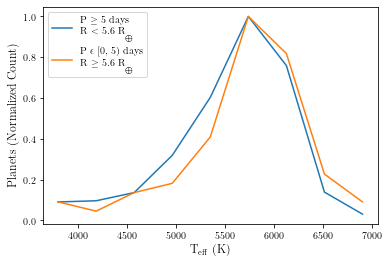

In [5]:
# characterize the stars in terms of hot/not hot jupiters
teffbins = np.linspace(3600, 7100, 10)
# to mask out errors
emsk = (slice(None), 0)


def calc_hist(planets, candidates):
    temp = planets.getMaskedData('temperature')
    period = planets.getMaskedData('period')
    tempc = candidates.getMaskedData('temperature')
    periodc = candidates.getMaskedData('period')
    hist, bins = np.histogram(temp, teffbins)
    hist2, bins = np.histogram(tempc ,teffbins)
    hist += hist2
    bin_centers = bins[:-1] + 0.5 * (bins[1]-bins[0])
    return hist, bin_centers

allhist, binc = calc_hist(planets, candidates)
hothist, binc = calc_hist(hotPlanets, hotCand)
print(binc, allhist)
plt.plot(binc, allhist/np.max(allhist), label = 'P $\\geq$ 5 days \n R $<$ 5.6 R$_\\bigoplus$')
plt.plot(binc, hothist/np.max(hothist), label = 'P $\\epsilon$ [0, 5) days\nR $\geq$ 5.6 R$_\\bigoplus$')
plt.legend(loc = 'upper left')
plt.ylabel('Planets (Normalized Count)', fontsize = 12)
plt.xlabel(r'T$_{\mathrm{eff}}$ (K)', fontsize = 12)

number of planets before period cut:
2175

number of planets to fail period cut:
2346

number of planets left:
347

number of candidates before period cut:
593

number of candidates to fail period cut:
1839

number of candidates left:
100

number of planets before period cut:
2175

number of planets to fail period cut:
1634

number of planets left:
997

number of candidates before period cut:
593

number of candidates to fail period cut:
1480

number of candidates left:
290

number of planets before period cut:
2175

number of planets to fail period cut:
1874

number of planets left:
774

number of candidates before period cut:
593

number of candidates to fail period cut:
1618

number of candidates left:
177



Text(0.5, 0, 'T$_{\\mathrm{eff}}$ (K)')

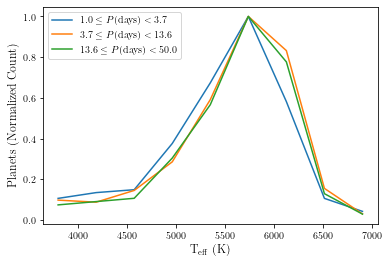

In [6]:
# do a similar analysis but without separating into just hot/not hot jupiters
period_bins = np.logspace(0,np.log10(50),4)

for i in range(len(period_bins) - 1):
    prange = (period_bins[i], period_bins[i+1])
    cpp = copy.copy(planets)
    cpc = copy.copy(candidates)
    cpp.periodCut(prange)
    cpc.periodCut(prange)
    hist, binc = calc_hist(cpp, cpc)
    ls = '-'
#     if i == 0:
#         ls = '--'
#     else:
#         ls = '-'
    plt.plot(binc, hist/np.max(hist), label = r"$%.1f \leq P (\mathrm{days}) < %.1f$"%prange,
            linestyle = ls)
plt.legend()
plt.ylabel('Planets (Normalized Count)', fontsize = 12)
plt.xlabel(r'T$_{\mathrm{eff}}$ (K)', fontsize = 12)

number of planets before planetary radius cut:
2175

number of planets to fail planetary radius cut:
1651

number of planets left:
967

number of candidates before planetary radius cut:
593

number of candidates to fail planetary radius cut:
1093

number of candidates left:
403

number of planets before planetary radius cut:
2175

number of planets to fail planetary radius cut:
1280

number of planets left:
1095

number of candidates before planetary radius cut:
593

number of candidates to fail planetary radius cut:
1447

number of candidates left:
80

number of planets before planetary radius cut:
2175

number of planets to fail planetary radius cut:
2538

number of planets left:
88

number of candidates before planetary radius cut:
593

number of candidates to fail planetary radius cut:
1869

number of candidates left:
29



Text(0.5, 0, 'T$_{\\mathrm{eff}}$ (K)')

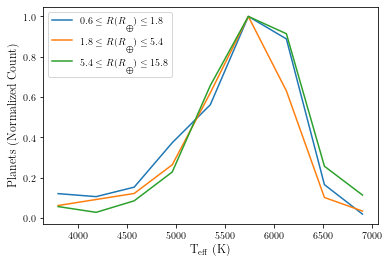

In [7]:
# do a similar analysis but without separating into just hot/not hot jupiters
radius_bins = np.logspace(-0.2, 1.2, 4)
for i in range(len(radius_bins) - 1):
    prange = (radius_bins[i], radius_bins[i+1])
    cpp = copy.copy(planets)
    cpc = copy.copy(candidates)
    cpp.radiusCut(prange)
    cpc.radiusCut(prange)
    hist, binc = calc_hist(cpp, cpc)
#     if i == 0:
#         ls = '--'
#     else:
#         ls = '-'
    plt.plot(binc, hist/np.max(hist), label = r"$%.1f \leq R (R_\bigoplus) \leq %.1f$"%prange,
            linestyle = ls)
plt.legend()
plt.ylabel('Planets (Normalized Count)', fontsize = 12)
plt.xlabel(r'T$_{\mathrm{eff}}$ (K)', fontsize = 12)

In [9]:
# looking at metallicity
# winnow by the planets that have Fe/H def
plc = copy.copy(planets)
cac = copy.copy(candidates)
def equal(data, limit):
    return np.where(data == limit, 1, 0)
plc.winnow('metallicity_def', '[Fe/H]', 'met_def', equal)
# candidates already have the Fe/H definition
metp = plc.getMaskedData('metallicity')


number of planets before met_def cut:
1483

number of planets to fail met_def cut:
897

number of planets left:
1483

number of candidates before met_def cut:
593



KeyError: 'metallicity_def'